In [41]:
import numpy as np
from pylab import *
from sigproc import SigprocFile
import glob
from scipy.stats import kurtosis, skew
import os
from plot_fredda import load4d
%matplotlib inline

In [2]:

def load_aligned(files, nsamp=2048):
    files = list(map(SigprocFile, files))
    max_tstart = max(files, key=lambda f:f.tstart).tstart
    all_data = []
    for f in files:
        mjddiff = max_tstart - f.tstart
        sampoff = int(round(mjddiff * 86400 / f.tsamp))
        assert sampoff >= 0
        all_data.append(f[sampoff:sampoff+nsamp].T)

    all_data = np.array(all_data)
    return all_data

In [3]:
files = glob.glob('/Users/ban115/bolton/craft/data/busyrfi/20190318081323/ICS/C000/ak*/beam*/beam.fil')
files = [f for f in files if 'ak10' not in f]
d = load_aligned(files, nsamp=2048)
(nant, nchan, nint) = d.shape
print(d.shape)

(46, 336, 2048)


In [4]:
bpmean = d.mean(axis=2).reshape(nant, nchan, 1)
bpstd = d.std(axis=2).reshape(nant, nchan, 1)
drescale = (d - bpmean) / bpstd

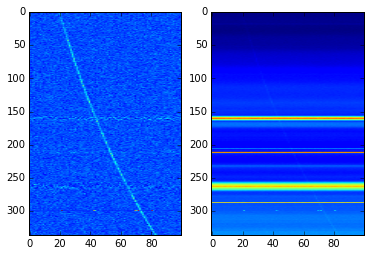

In [5]:
fig, ax = subplots(1,2)
ax[0].imshow(drescale.mean(axis=0)[:,1700:1800], aspect='auto')
ax[1].imshow(d.mean(axis=0)[:,1700:1800], aspect='auto')


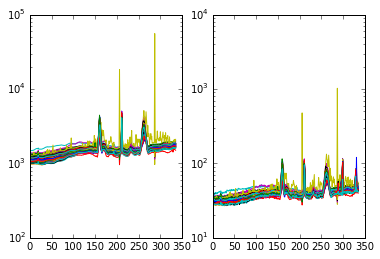

In [6]:
fig, ax = subplots(1,2)
ax[0].semilogy(bpmean[:,:,0].T)
ax[1].semilogy(bpstd[:,:,0].T)
x = 1

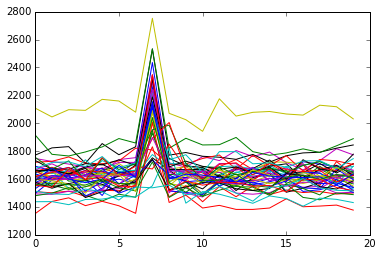

In [7]:
# here is one of the blips in all antennas. Single channel - small time range.
blip = d[:,299,1535:1555].T
blipmean = blip[:, 10:].mean(axis=1).reshape(-1, 1)*0
plot(blip - blipmean)
x = 1

In [22]:
Nblock = 256
dblock = d.reshape(nant, nchan, -1, Nblock)
print(dblock.shape)

(46, 336, 8, 256)


(46, 336, 8, 256)


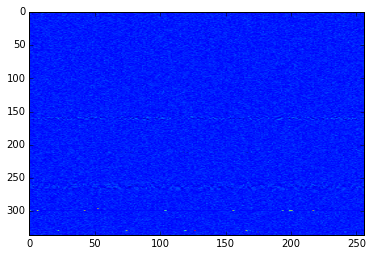

In [23]:
dblock_mean = dblock.mean(axis=3)[:,:,:, np.newaxis]
dblock_std = dblock.std(axis=3)[:,:,:,np.newaxis]
dblock_skew = skew(dblock, axis=3)
dblock_kurt = kurtosis(dblock, axis=3)

dblock_rescale = (dblock - dblock_mean)/dblock_std
print((dblock_rescale.shape))
imshow(dblock_rescale[:, :,3, :].mean(axis=0) , aspect='auto')

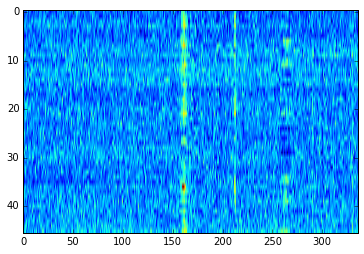

In [24]:
# relative change in mean bandpass vs antenna and frequency. Some antennas show basically no change while others are large one.
imshow(dblock_mean[:, :, -1, 0]/dblock_mean[:, :, 0, 0], aspect='auto')
x = 1

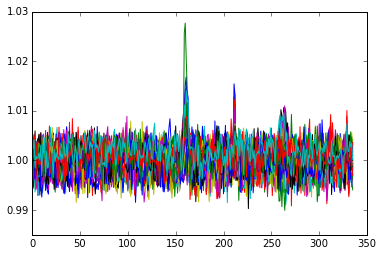

In [25]:
plot((dblock_mean[:, :, -1, 0]/dblock_mean[:, :, 0, 0]).T);


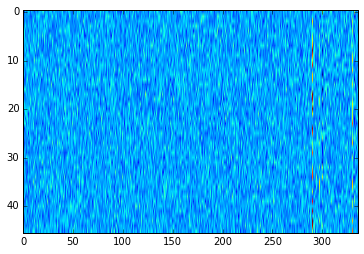

In [26]:
# relative change in std bandpass vs antenna and frequency. Some antennas show basically no change while others are large one.
# The frequencies that chage are different.
imshow(dblock_std[:, :, -1, 0]/dblock_std[:, :, 0, 0], aspect='auto')
x=1

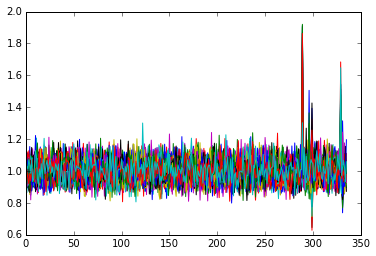

In [27]:
plot((dblock_std[:, :, -1, 0]/dblock_std[:, :, 0, 0]).T);


(-5, 5)

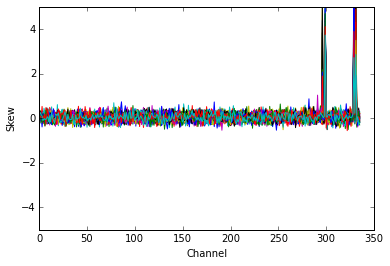

In [28]:
plot((dblock_skew[:,:,0]).T);
xlabel('Channel')
ylabel('Skew')
ylim(-5,5)

(-5, 5)

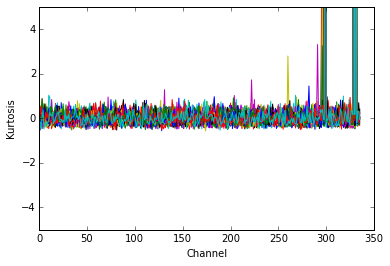

In [18]:
plot((dblock_kurt[:,:,0]).T);
xlabel('Channel')
ylabel('Kurtosis')
ylim(-5,5)

(336, 4, 512)


(-5, 5)

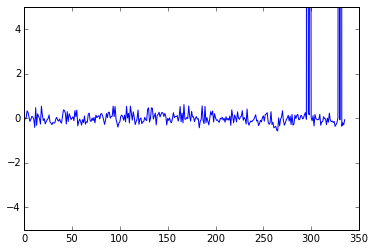

In [17]:
ics = dblock_rescale.mean(axis=0)
print(ics.shape)
plot(kurtosis(ics[:,0,:], axis=1))
ylim(-5,5)

In [105]:
#Satellite RFI
datdir = '/Users/ban115/bolton/craft/data/busyrfi/satrfi'
def getepoch(f):
    return int(os.path.basename(f).split('_e')[1].replace('.dat',''))

def load_data(dname):
    files = sorted(glob.glob(os.path.join(datdir, dname+'_e*.dat')), key=getepoch)
    d = []
    for f in files:
        d.append(load4d(f))
    
    return np.array(d)
    

In [106]:
allmean = load_data('mean')
allstd = load_data('std')
allkurt = load_data('kurt')
alloff = load_data('offset')
allscale = load_data('scale')
alldecayoff = load_data('decay_offset')

/Users/ban115/bolton/craft/data/busyrfi/satrfi/mean_e-1.dat (1, 1, 1, 336) 1 zeros? False max/min/mean/sum 75612.9453125/924.585998535/3280.13085938/1102124.0 max at (0, 0, 0, 195) NaNs? 0
/Users/ban115/bolton/craft/data/busyrfi/satrfi/mean_e0.dat (1, 1, 1, 336) 1 zeros? False max/min/mean/sum 75612.9453125/924.585998535/3280.13085938/1102124.0 max at (0, 0, 0, 195) NaNs? 0
/Users/ban115/bolton/craft/data/busyrfi/satrfi/mean_e2.dat (1, 1, 1, 336) 1 zeros? False max/min/mean/sum 75392.796875/925.845458984/3293.68530273/1106678.25 max at (0, 0, 0, 195) NaNs? 0
/Users/ban115/bolton/craft/data/busyrfi/satrfi/mean_e4.dat (1, 1, 1, 336) 1 zeros? False max/min/mean/sum 74950.0234375/927.318847656/3311.99145508/1112829.125 max at (0, 0, 0, 195) NaNs? 0
/Users/ban115/bolton/craft/data/busyrfi/satrfi/mean_e6.dat (1, 1, 1, 336) 1 zeros? False max/min/mean/sum 74412.1875/924.89239502/3333.67675781/1120115.375 max at (0, 0, 0, 195) NaNs? 0
/Users/ban115/bolton/craft/data/busyrfi/satrfi/mean_e8.dat 

(6, 1, 1, 1, 336)

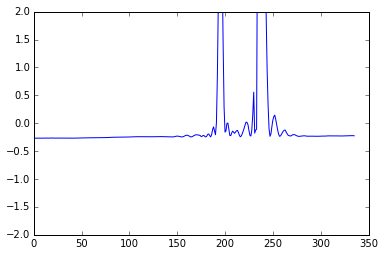

In [122]:
m = (allmean[2, 0, 0, :,:]).T;
plot((m - m.mean())/m.std())
ylim(-2,2)
allmean.shape


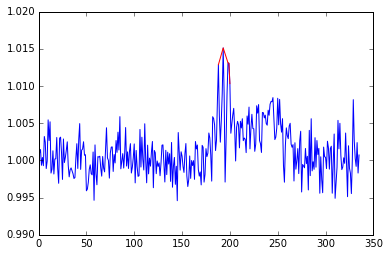

In [118]:
ratio = (allmean[2, 0, 0, 0,:]/allmean[1,0,0,0,:]).T
badmask = abs(ratio - 1) > 0.01
f = np.arange(len(ratio))
plot(f, ratio);
plot(f[badmask], ratio[badmask], 'r')

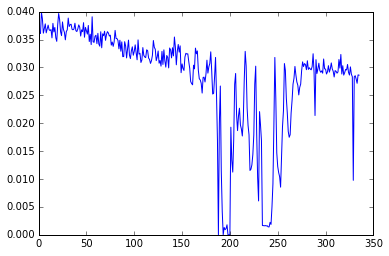

In [109]:
plot(allscale[2,0,0,0,:].T);

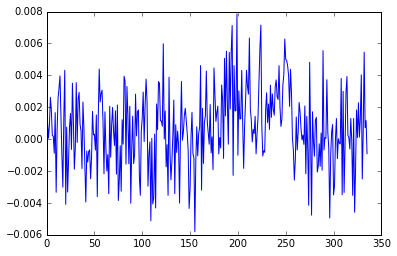

In [110]:
plot((alldecayoff[2, 0, 0, 0,:] - allmean[2, 0, 0, 0,:])/allmean[2, 0, 0, 0,:])


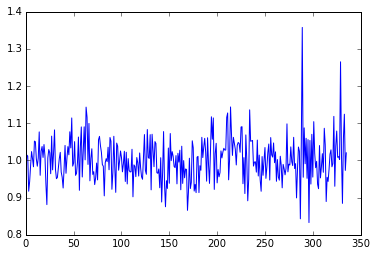

In [113]:
plot((allstd[2, 0, 0, 0,:]/allstd[1,0,0,0,:]).T)


(6, 1, 1, 1, 336)

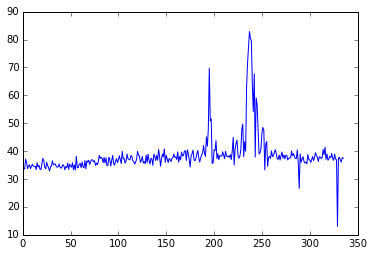

In [126]:
m = (allmean[2, 0, 0, :,:]/allstd[2, 0, 0, :,:]).T;
#plot((m - m.mean())/m.std())
plot(m)


0.000651041666667


(150, 260)

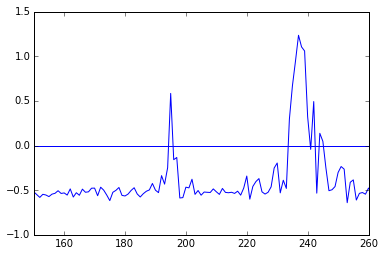

In [153]:
m = (allmean[2, 0, 0, :,:]**2/allstd[2, 0, 0, :,:]**2).T;
#plot((m - m.mean())/m.std())
n = 1024*3
plot((m)/n - 1)


print(2.0/float(n))
axhline(0)
xlim(150,260)